In [62]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Calcular estatísticas descritivas (média, mediana, desvio padrão).

In [85]:
csv_path = "data_root/earthquakes.csv"
df = pd.read_csv(csv_path)
df.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [86]:
df_dropped = df.drop(columns=["time","updated", "url", "detailUrl", "code", "ids", "types"])
#df_dropped.head()

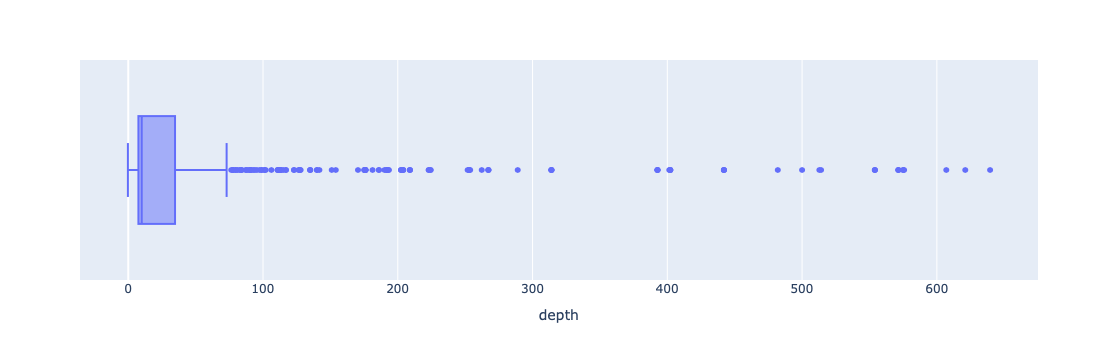

In [88]:
px.box(data_frame=df_dropped,x='depth')

In [65]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   felt             1137 non-null   int64  
 6   cdi              1137 non-null   int64  
 7   mmi              1137 non-null   int64  
 8   alert            764 non-null    object 
 9   status           1137 non-null   object 
 10  tsunami          1137 non-null   int64  
 11  sig              1137 non-null   int64  
 12  net              1137 non-null   object 
 13  sources          1137 non-null   object 
 14  nst              1137 non-null   int64  
 15  dmin             1137 non-null   float64
 16  rms              1137 non-null   float64
 17  gap           

In [66]:
# Média
df_media = df_dropped["magnitude"].mean()
print(f"A média da magnitude é: {df_media:.2f}")

A média da magnitude é: 4.86


In [67]:
# Mediana
df_mediana = df_dropped["magnitude"].median()
print(f"A mediana da magnitude é: {df_mediana:.2f}")

A mediana da magnitude é: 5.30


In [68]:
# Desvio Padrão
df_desvio_padrao = df_dropped["magnitude"].std()
print(f"O Desvio Padrão da magnitude é: {df_desvio_padrao:.2f}")

O Desvio Padrão da magnitude é: 1.05


In [69]:
# criando novas colunas para separar data e hora
df_dropped['data'] = df_dropped['date'].str.split('T').str[0]
df_dropped['hora'] = df_dropped['date'].str.split('T').str[1]

# Converter a hora para dattime epara facilitar manipulação
df_dropped['hora'] = pd.to_datetime(df_dropped['hora'], format='%H:%M:%S').dt.time

# Função para categorizar o período do dia
def categorizar_periodo(hora):
    if 5 <= hora.hour < 12:
        return 'Manhã'
    elif 12 <= hora.hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Aplicar a função e criar a nova coluna 'periodo'
df_dropped['periodo'] = df_dropped['hora'].apply(categorizar_periodo)

#print(df_dropped)

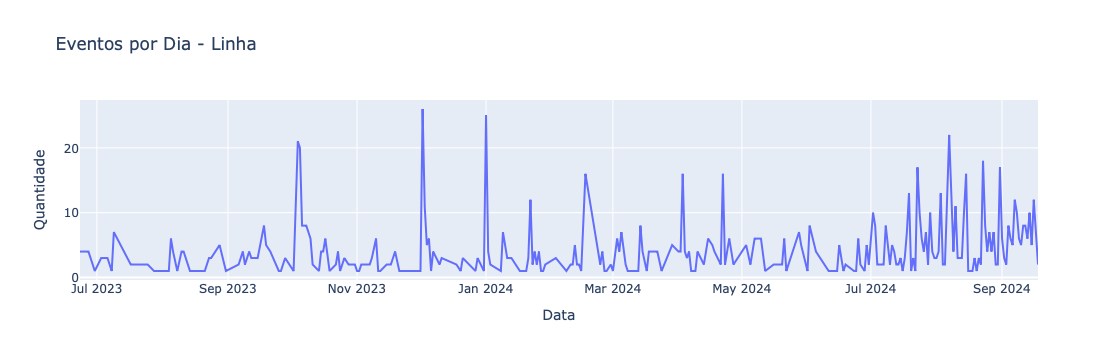

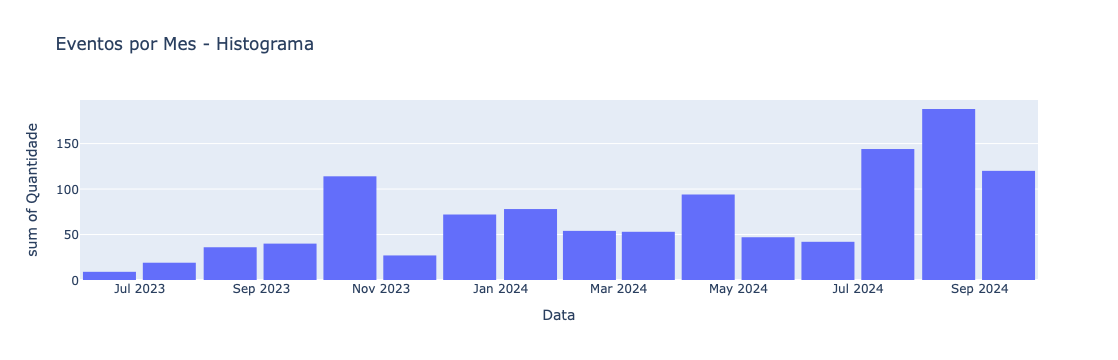

In [70]:
# Converter para formato datetime
df_dropped['data'] = pd.to_datetime(df_dropped['data'])


df_agrupado_data = df_dropped.groupby(df_dropped['data'].dt.date).size().reset_index(name='quantidade')

fig_por_dia = px.line(df_agrupado_data, x='data', y='quantidade', title='Eventos por Dia - Linha', labels={'data': 'Data', 'quantidade': 'Quantidade'})
fig_por_dia.show()


fig_por_mes = px.histogram(df_agrupado_data, x='data', y='quantidade', title='Eventos por Mes - Histograma', labels={'data': 'Data', 'quantidade': 'Quantidade'})
fig_por_mes.update_layout(bargap=0.1)  
fig_por_mes.show()

In [71]:
colunas_selecionadas = [
    'magnitude', 'data', 'hora', 'periodo', 'subnational', 'city', 'depth', 'felt', 'continent', 'latitude', 'longitude', 
    'mmi', 'cdi'
]

df_selecionado = df_dropped[colunas_selecionadas]

In [72]:
sem_nulos = df_selecionado.dropna(subset=['city', 'continent', 'subnational'])

In [73]:
# Calcular os quartis Q1 e Q3 para a coluna 'depth'
Q1_depth = sem_nulos['depth'].quantile(0.25)
Q3_depth = sem_nulos['depth'].quantile(0.75)

# Calcular o intervalo interquartílico (IQR) para 'depth'
IQR_depth = Q3_depth - Q1_depth

# Calcular os limites inferior e superior (fences) para 'depth'
limite_inferior_depth = Q1_depth - 1.5 * IQR_depth
limite_superior_depth = Q3_depth + 1.5 * IQR_depth

# Remover outliers com base nos limites para 'depth'
sem_nulos = sem_nulos[(sem_nulos['depth'] >= limite_inferior_depth) & (sem_nulos['depth'] <= limite_superior_depth)]

# Calcular os quartis Q1 e Q3 para a coluna 'mmi'
Q1_mmi = sem_nulos['mmi'].quantile(0.25)
Q3_mmi = sem_nulos['mmi'].quantile(0.75)

# Calcular o intervalo interquartílico (IQR) para 'mmi'
IQR_mmi = Q3_mmi - Q1_mmi

# Calcular os limites inferior e superior (fences) para 'mmi'
limite_inferior_mmi = Q1_mmi - 1.5 * IQR_mmi
limite_superior_mmi = Q3_mmi + 1.5 * IQR_mmi

# Remover outliers com base nos limites para 'mmi'
sem_nulos = sem_nulos[(sem_nulos['mmi'] >= limite_inferior_mmi) & (sem_nulos['mmi'] <= limite_superior_mmi)]

# Calcular os quartis Q1 e Q3 para a coluna 'magnitude'
Q1_magnitude = sem_nulos['magnitude'].quantile(0.25)
Q3_magnitude = sem_nulos['magnitude'].quantile(0.75)

# Calcular o intervalo interquartílico (IQR) para 'magnitude'
IQR_magnitude = Q3_magnitude - Q1_magnitude

# Calcular os limites inferior e superior (fences) para 'magnitude'
limite_inferior_magnitude = Q1_magnitude - 1.5 * IQR_magnitude
limite_superior_magnitude = Q3_magnitude + 1.5 * IQR_magnitude

# Remover outliers com base nos limites para 'magnitude'
sem_nulos = sem_nulos[(sem_nulos['magnitude'] >= limite_inferior_magnitude) & (sem_nulos['magnitude'] <= limite_superior_magnitude)]


In [74]:
# Caso houver todos os dados da mesma linha iguais e removido, pois como ha mais dados de um mesmo local, e em um mesmo periodo, ha duplicados porem com informacoes diferentes e relevantes
if sem_nulos.eq(sem_nulos.iloc[0]).all().all():
    # Remove duplicatas
    sem_nulos = sem_nulos.drop_duplicates()

## Graficos pre-limpeza

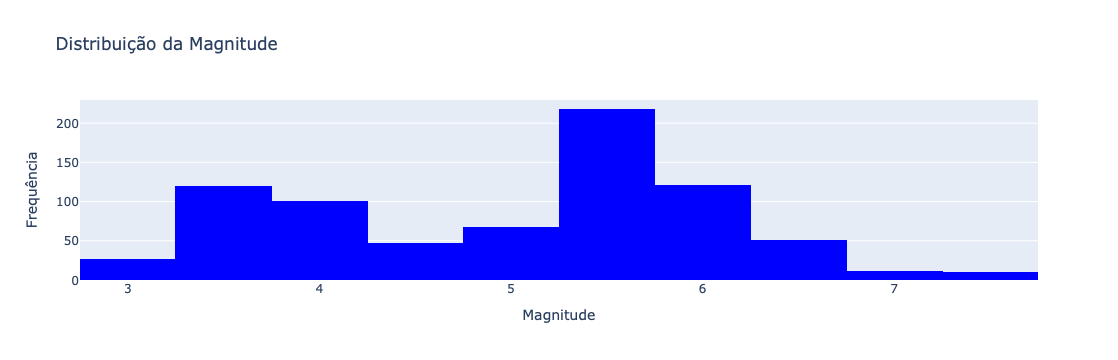

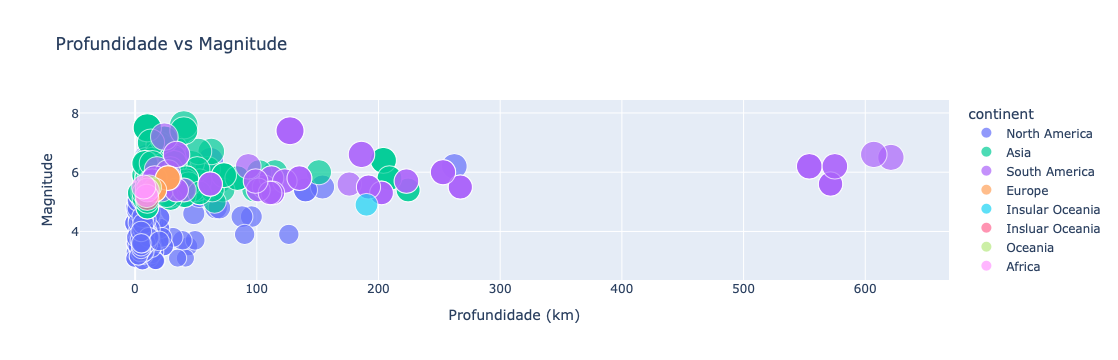

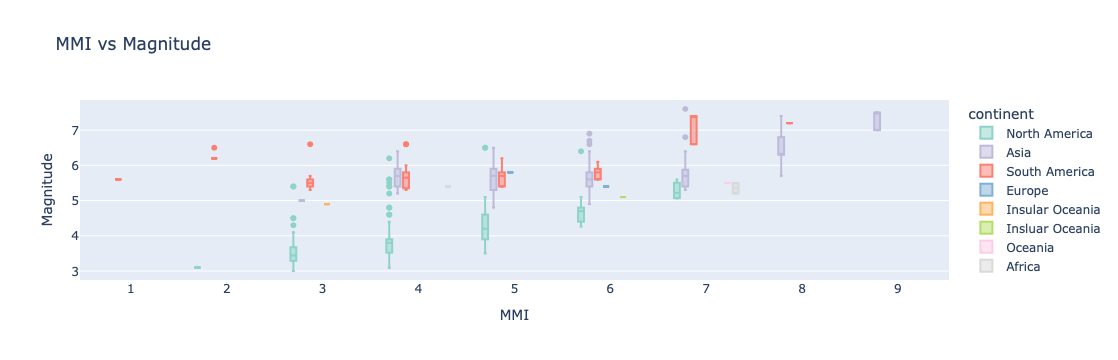

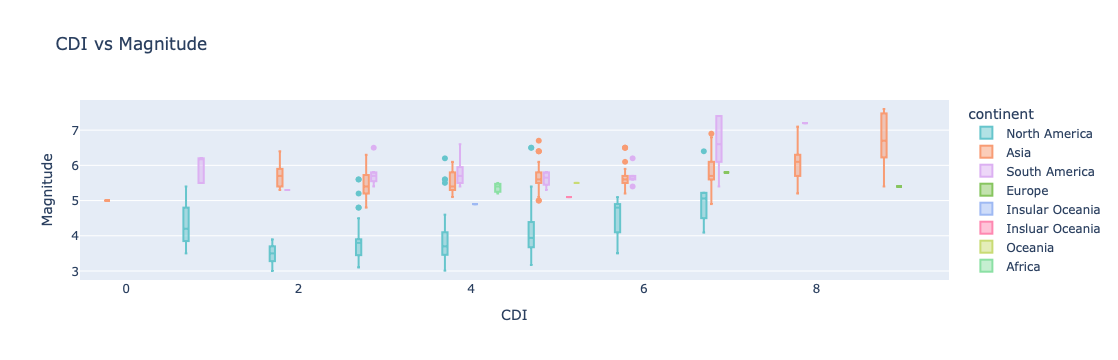

In [75]:
df_dropped = df_dropped[df_dropped['felt'] > 0]

frequencia_por_continente = df_dropped['continent'].value_counts().reset_index()
frequencia_por_continente.columns = ['Continente', 'Frequência']
frequencia_por_continente

# 1. Distribuição da Magnitude
fig1 = px.histogram(
    df_dropped, 
    x='magnitude', 
    nbins=20, 
    title='Distribuição da Magnitude',
    labels={'magnitude': 'Magnitude'},
    color_discrete_sequence=['blue']
)
fig1.update_layout(xaxis_title='Magnitude', yaxis_title='Frequência')
fig1.show()

# 2. Relação entre Profundidade e Magnitude
fig2 = px.scatter(
    df_dropped, 
    x='depth', 
    y='magnitude', 
    color='continent',
    size='magnitude',
    title='Profundidade vs Magnitude',
    labels={'depth': 'Profundidade (km)', 'magnitude': 'Magnitude'},
    hover_data=['city', 'subnational', 'felt']
)
fig2.update_layout(xaxis_title='Profundidade (km)', yaxis_title='Magnitude')
fig2.show()

# 3. Intensidade Percebida (MMI/CDI) vs Magnitude
fig3 = px.box(
    df_dropped, 
    x='mmi', 
    y='magnitude', 
    color='continent',
    title='MMI vs Magnitude',
    labels={'mmi': 'MMI', 'magnitude': 'Magnitude'},
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig3.update_layout(xaxis_title='MMI', yaxis_title='Magnitude')
fig3.show()

fig4 = px.box(
    df_dropped, 
    x='cdi', 
    y='magnitude', 
    color='continent',
    title='CDI vs Magnitude',
    labels={'cdi': 'CDI', 'magnitude': 'Magnitude'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig4.update_layout(xaxis_title='CDI', yaxis_title='Magnitude')
fig4.show()

# 4. Mapa Geográfico dos Terremotos
fig5 = px.scatter_geo(
    df_dropped, 
    lat='latitude', 
    lon='longitude', 
    color='continent',
    size='magnitude',
    title='Mapa Geográfico dos Terremotos',
    labels={'latitude': 'Latitude', 'longitude': 'Longitude', 'magnitude': 'Magnitude'},
    hover_name='city',
    projection='natural earth'
)
fig5.update_layout(legend_title='Continente')
fig5.show()

# 5. Frequência de Terremotos por Continente
fig6 = px.bar(
    frequencia_por_continente, 
    y='Frequência', 
    title='Frequência de Terremotos por Continente',
    color='Continente',
    color_discrete_sequence=px.colors.qualitative.Set2,
    text='Frequência'
)
fig6.update_layout(xaxis_title='Continente', yaxis_title='Frequência')
fig6.show()


## Graficos pos-limpeza

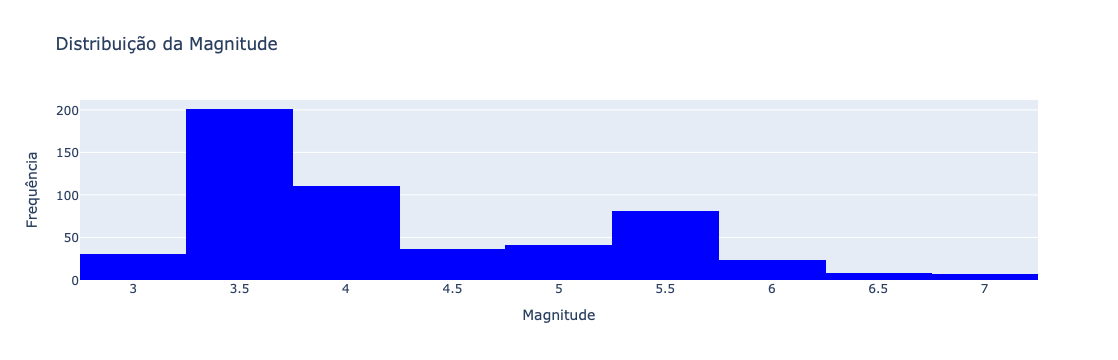

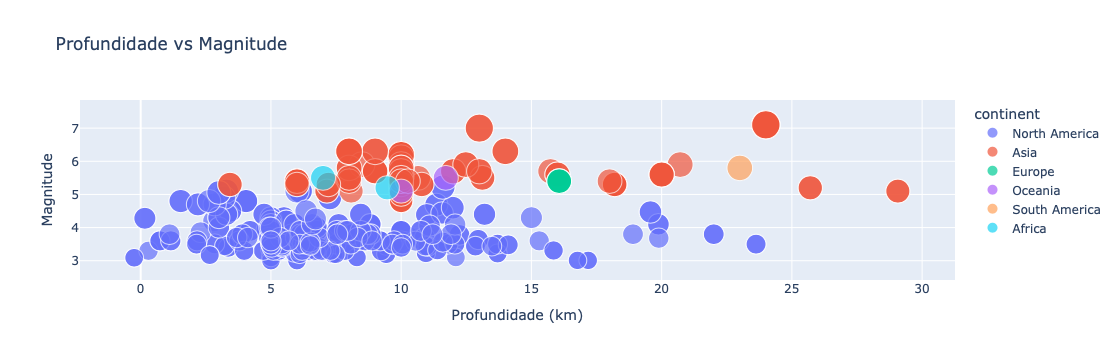

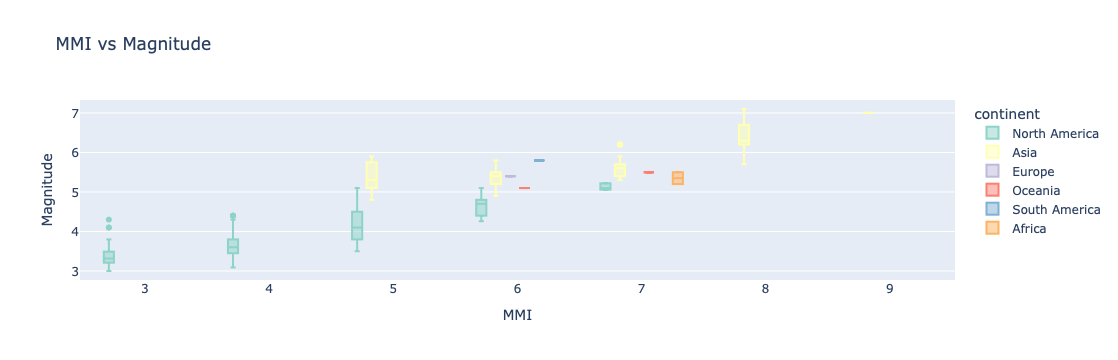

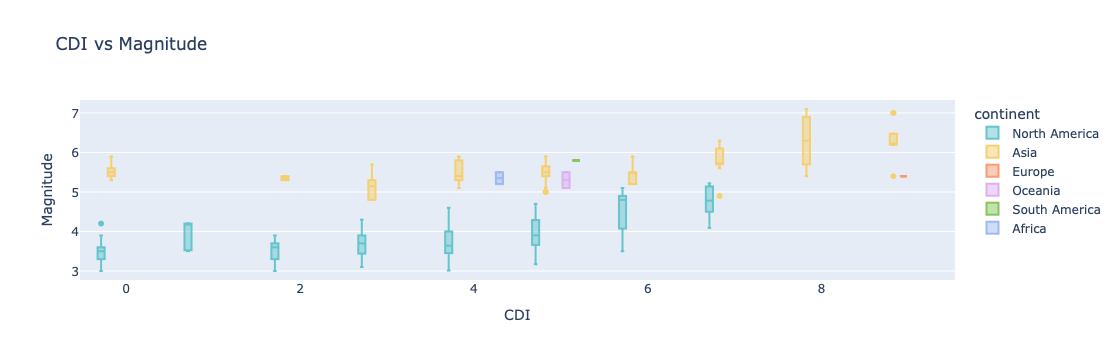

In [76]:
def classificar_impacto(magnitude):
    if magnitude >= 6.0:
        return 'Alto'
    elif magnitude >= 5.1:
        return 'Médio'
    else:
        return 'Baixo'

# Aplicar a função para criar a coluna 'impacto'
sem_nulos['impacto'] = sem_nulos['magnitude'].apply(classificar_impacto)

# Calcular a profundidade média por magnitude
profundidade_media = sem_nulos.groupby('magnitude')['depth'].mean().reset_index()

# Substituir 'Insular Oceania' por 'Oceania'
sem_nulos['continent'] = sem_nulos['continent'].replace('Insluar Oceania', 'Insular Oceania')
sem_nulos['continent'] = sem_nulos['continent'].replace('Insular Oceania', 'Oceania')

# 1. Distribuição da Magnitude
fig1 = px.histogram(
    sem_nulos, 
    x='magnitude', 
    nbins=20, 
    title='Distribuição da Magnitude',
    labels={'magnitude': 'Magnitude'},
    color_discrete_sequence=['blue']
)
fig1.update_layout(xaxis_title='Magnitude', yaxis_title='Frequência')
fig1.show()

# 2. Relação entre Profundidade e Magnitude
fig2 = px.scatter(
    sem_nulos, 
    x='depth', 
    y='magnitude', 
    color='continent',
    size='magnitude',
    title='Profundidade vs Magnitude',
    labels={'depth': 'Profundidade (km)', 'magnitude': 'Magnitude'},
    hover_data=['city', 'subnational', 'felt']
)
fig2.update_layout(xaxis_title='Profundidade (km)', yaxis_title='Magnitude')
fig2.show()

# 3. Intensidade Percebida (MMI/CDI) vs Magnitude
fig3 = px.box(
    sem_nulos, 
    x='mmi', 
    y='magnitude', 
    color='continent',
    title='MMI vs Magnitude',
    labels={'mmi': 'MMI', 'magnitude': 'Magnitude'},
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig3.update_layout(xaxis_title='MMI', yaxis_title='Magnitude')
fig3.show()

fig4 = px.box(
    sem_nulos, 
    x='cdi', 
    y='magnitude', 
    color='continent',
    title='CDI vs Magnitude',
    labels={'cdi': 'CDI', 'magnitude': 'Magnitude'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig4.update_layout(xaxis_title='CDI', yaxis_title='Magnitude')
fig4.show()

# 4. Mapa Geográfico dos Terremotos
fig5 = px.scatter_geo(
    sem_nulos, 
    lat='latitude', 
    lon='longitude', 
    color='continent',
    size='magnitude',
    title='Mapa Geográfico dos Terremotos',
    labels={'latitude': 'Latitude', 'longitude': 'Longitude', 'magnitude': 'Magnitude'},
    hover_name='city',
    projection='natural earth'
)
fig5.update_layout(legend_title='Continente')
fig5.show()

# 5. Frequência de Terremotos por Continente
fig6 = px.bar(
    frequencia_por_continente, 
    y='Frequência', 
    title='Frequência de Terremotos por Continente',
    color='Continente',
    color_discrete_sequence=px.colors.qualitative.Set2,
    text='Frequência'
)
fig6.update_layout(xaxis_title='Continente', yaxis_title='Frequência')
fig6.show()


In [77]:
# Criar uma coluna para faixa de magnitude
df_dropped['magnitude_range'] = pd.cut(df_dropped['magnitude'], bins=[0, 3, 4, 5, 6, 7, 10], 
                                        labels=['0-3', '3-4', '4-5', '5-6', '6-7', '7-10'])

# Contar terremotos por continente e faixa de magnitude
frequencia_por_continente_magnitude = df_dropped.groupby(['continent', 'magnitude_range'], observed=False).size().reset_index(name='frequencia')

# Gerar o gráfico de barras
fig6 = px.bar(
    frequencia_por_continente_magnitude, 
    y='continent', 
    x='frequencia', 
    color='magnitude_range',
    title='Frequência de Terremotos por Continente e Faixa de Magnitude (Pre-processada)',
    labels={'continent': 'Continente', 'frequencia': 'Frequência', 'magnitude_range': 'Faixa de Magnitude'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    text='frequencia'
)
fig6.update_layout(
    xaxis_title='Continente', 
    yaxis_title='Frequência',
    barmode='stack',  # Empilhar as barras para mostrar a distribuição de magnitudes
)

#========================================================================================================================================

sem_nulos['magnitude_range'] = pd.cut(sem_nulos['magnitude'], bins=[0, 3, 4, 5, 6, 7, 10], 
                                        labels=['0-3', '3-4', '4-5', '5-6', '6-7', '7-10'])

frequencia_por_continente_magnitude2 = sem_nulos.groupby(['continent', 'magnitude_range'], observed=False).size().reset_index(name='frequencia')

fig7 = px.bar(
    frequencia_por_continente_magnitude2, 
    y='continent', 
    x='frequencia', 
    color='magnitude_range',
    title='Frequência de Terremotos por Continente e Faixa de Magnitude (Pos-processada)',
    labels={'continent': 'Continente', 'frequencia': 'Frequência', 'magnitude_range': 'Faixa de Magnitude'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    text='frequencia'
)
fig7.update_layout(
    xaxis_title='Continente', 
    yaxis_title='Frequência',
    barmode='stack',
)

fig6.show()
fig7.show()

In [78]:
sem_nulos.reset_index(drop=True, inplace=True)
sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   magnitude        536 non-null    float64       
 1   data             536 non-null    datetime64[ns]
 2   hora             536 non-null    object        
 3   periodo          536 non-null    object        
 4   subnational      536 non-null    object        
 5   city             536 non-null    object        
 6   depth            536 non-null    float64       
 7   felt             536 non-null    int64         
 8   continent        536 non-null    object        
 9   latitude         536 non-null    float64       
 10  longitude        536 non-null    float64       
 11  mmi              536 non-null    int64         
 12  cdi              536 non-null    int64         
 13  impacto          536 non-null    object        
 14  magnitude_range  536 non-null    category 

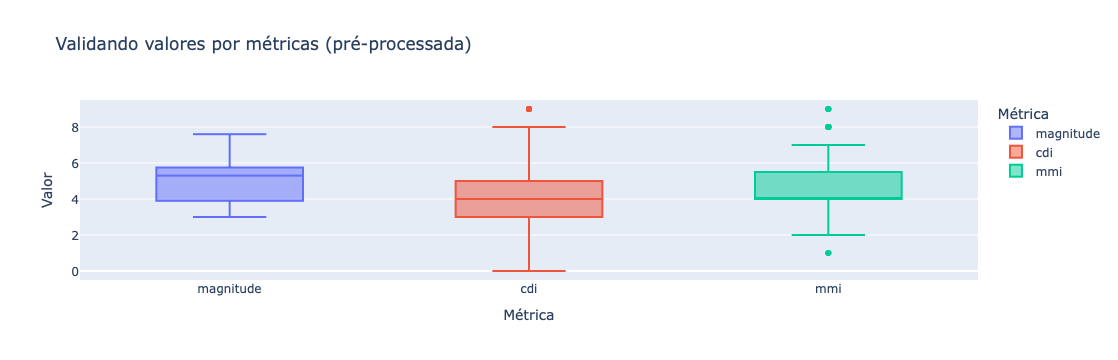

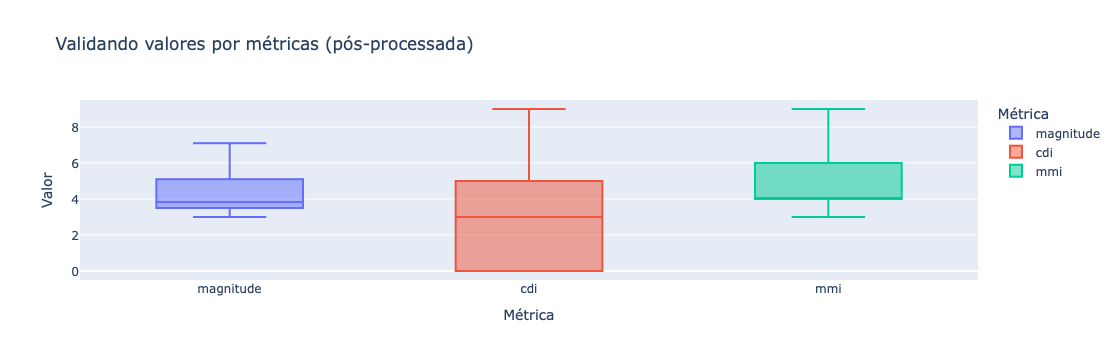

In [79]:
sem_nulos['mmi'].fillna(0)
df_meltada_1 = pd.melt(
    df_dropped,
    value_vars=['magnitude', 'cdi', 'mmi'],  
    var_name='medida', 
    value_name='valor'  
)

df_meltada_2 = pd.melt(
    sem_nulos,
    value_vars=['magnitude', 'cdi', 'mmi'],  
    var_name='medida', 
    value_name='valor'  
)

fig_analise_outliers_s_nulo3 = px.box(
    data_frame=df_meltada_1, 
    x='medida',   # Usando 'medida' como eixo x para separar as métricas
    y='valor', 
    color='medida',  
    labels={'valor': 'Valor', 'medida': 'Métrica'}, 
    title='Validando valores por métricas (pré-processada)',
    category_orders={'medida': ['magnitude', 'cdi', 'mmi']}  # Ordena as métricas
)

fig_analise_outliers_s_nulo4 = px.box(
    data_frame=df_meltada_2, 
    x='medida',  
    y='valor', 
    color='medida',  
    labels={'valor': 'Valor', 'medida': 'Métrica'}, 
    title='Validando valores por métricas (pós-processada)',
    category_orders={'medida': ['magnitude', 'cdi', 'mmi']}  
)

# Exibe os gráficos
fig_analise_outliers_s_nulo3.show()
fig_analise_outliers_s_nulo4.show()


In [80]:
sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   magnitude        536 non-null    float64       
 1   data             536 non-null    datetime64[ns]
 2   hora             536 non-null    object        
 3   periodo          536 non-null    object        
 4   subnational      536 non-null    object        
 5   city             536 non-null    object        
 6   depth            536 non-null    float64       
 7   felt             536 non-null    int64         
 8   continent        536 non-null    object        
 9   latitude         536 non-null    float64       
 10  longitude        536 non-null    float64       
 11  mmi              536 non-null    int64         
 12  cdi              536 non-null    int64         
 13  impacto          536 non-null    object        
 14  magnitude_range  536 non-null    category 

In [81]:
# Agrupar por magnitude e calcular a média da profundidade
profundidade_media_por_magnitude = sem_nulos.groupby('magnitude')['depth'].mean()

intervalos = {
    '0-3': profundidade_media_por_magnitude.loc[0.0:3.0].mean(), 
    '3-4': profundidade_media_por_magnitude.loc[3.0:3.9].mean(),
    '4-5': profundidade_media_por_magnitude.loc[4.0:4.9].mean(),
    '5-6': profundidade_media_por_magnitude.loc[5.0:5.9].mean(),
    '6-7': profundidade_media_por_magnitude.loc[6.0:6.9].mean(),
    '7-10': profundidade_media_por_magnitude.loc[7.0:10.0].mean()  
}

# Aplicar as mudanças no DataFrame
sem_nulos['media por magnitude'] = sem_nulos['magnitude_range'].map(intervalos)

In [82]:
print(df_meltada_2['medida'].value_counts())


medida
magnitude    536
cdi          536
mmi          536
Name: count, dtype: int64


In [83]:
sem_nulos

,magnitude,data,hora,periodo,subnational,city,depth,felt,continent,latitude,longitude,mmi,cdi,impacto,magnitude_range,media por magnitude
0,4.8,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,4.0440,1893,North America,32.3984,-102.0440,5,6,Baixo,4-5,8.028601
1,5.1,2024-09-17,00:49:42,Noite,Texas,Tarzan-Lenorah,6.1279,2042,North America,32.4140,-102.0570,5,6,Médio,5-6,10.632600
2,3.7,2024-09-16,11:22:08,Manhã,California,Los Angeles,10.9000,1580,North America,34.0678,-118.8070,4,4,Baixo,3-4,8.433737
3,3.9,2024-09-14,17:01:06,Tarde,Texas,Van Horn,6.2024,5,North America,31.6470,-104.4500,4,3,Baixo,3-4,8.433737
4,4.1,2024-09-14,17:01:06,Tarde,Texas,Van Horn,8.8140,4,North America,31.6323,-104.4730,4,3,Baixo,4-5,8.028601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,5.9,2023-10-07,07:40:30,Manhã,Herat,Zindah Jan,12.4800,3,Asia,34.6391,62.0327,7,5,Médio,5-6,10.632600
532,6.3,2023-10-07,07:12:49,Manhã,Herat,Zindah Jan,8.0000,11,Asia,34.5492,61.8840,8,9,Alto,6-7,9.916667
533,5.4,2023-10-07,06:49:41,Manhã,Herat,Zindah Jan,10.2570,0,Asia,34.5414,61.9547,7,0,Médio,5-6,10.632600
534,6.3,2023-10-07,06:41:03,Manhã,Herat,Zindah Jan,14.0000,19,Asia,34.6259,61.9260,8,8,Alto,6-7,9.916667


In [89]:
sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   magnitude            536 non-null    float64       
 1   data                 536 non-null    datetime64[ns]
 2   hora                 536 non-null    object        
 3   periodo              536 non-null    object        
 4   subnational          536 non-null    object        
 5   city                 536 non-null    object        
 6   depth                536 non-null    float64       
 7   felt                 536 non-null    int64         
 8   continent            536 non-null    object        
 9   latitude             536 non-null    float64       
 10  longitude            536 non-null    float64       
 11  mmi                  536 non-null    int64         
 12  cdi                  536 non-null    int64         
 13  impacto              536 non-null  